## Yield Curve Fitting Approach

In [1]:
import pandas as pd
from ECIRModel import ECIRModel
from CIRModel import BasicCIRModel
import numpy as np
import matplotlib.pyplot as plt

### Merge Dataframe

In [2]:
import pandas as pd

# Load the DGS_30 data
dgs_30_path = 'DGS_30.csv'
dgs_30_data = pd.read_csv(dgs_30_path)

# Load the DGS3MO data
dgs3mo_path = 'DGS3MO.csv'
dgs3mo_data = pd.read_csv(dgs3mo_path)

# Convert the 'DATE' column to datetime and set it as index for both DataFrames
dgs_30_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
dgs_30_data['Date'] = pd.to_datetime(dgs_30_data['Date'])
dgs_30_data.set_index('Date', inplace=True)

dgs3mo_data.rename(columns={'DATE': 'Date'}, inplace=True)
dgs3mo_data['Date'] = pd.to_datetime(dgs3mo_data['Date'])
dgs3mo_data.set_index('Date', inplace=True)

# Insert the DGS3MO data into the DGS_30 data as the first column
dgs_30_data.insert(0, 'DGS3MO', dgs3mo_data['DGS3MO'])

data=dgs_30_data
# Check the result
data.head()

,DGS3MO,DGS1,DGS2,DGS3,DGS4,DGS5,DGS6,DGS7,DGS8,DGS9,...,DGS21,DGS22,DGS23,DGS24,DGS25,DGS26,DGS27,DGS28,DGS29,DGS30
Date,,,,,,,,,,,,,,,,,,,,,
1981-09-01,17.010,17.0600,16.780,16.57,16.350396,16.120,15.898415,15.710,15.573295,15.478799,...,15.070462,15.049236,15.025332,14.997763,14.965539,14.927672,14.883173,14.831054,14.770326,14.7000
1981-09-02,16.650,17.1600,16.780,16.43,16.225968,16.090,15.924878,15.750,15.604572,15.490415,...,15.103136,15.093330,15.078842,15.057928,15.028848,14.989861,14.939224,14.875196,14.796035,14.7000
1981-09-03,16.960,17.3100,16.900,16.48,16.262789,16.140,15.967593,15.780,15.640102,15.546094,...,15.194779,15.177243,15.156281,15.130776,15.099616,15.061687,15.015875,14.961065,14.896145,14.8200
1981-09-04,16.640,17.2400,16.890,16.52,16.302912,16.170,16.019604,15.860,15.720523,15.604793,...,15.237907,15.232570,15.222048,15.204398,15.177676,15.139941,15.089248,15.023655,14.941220,14.8400
1981-09-07,16.565,17.2775,16.935,16.55,16.336354,16.215,16.066772,15.905,15.767511,15.657616,...,15.328694,15.324179,15.314622,15.298188,15.273045,15.237358,15.189294,15.127019,15.048698,14.9525


### CIR Model

#### Yield Curve Prediction

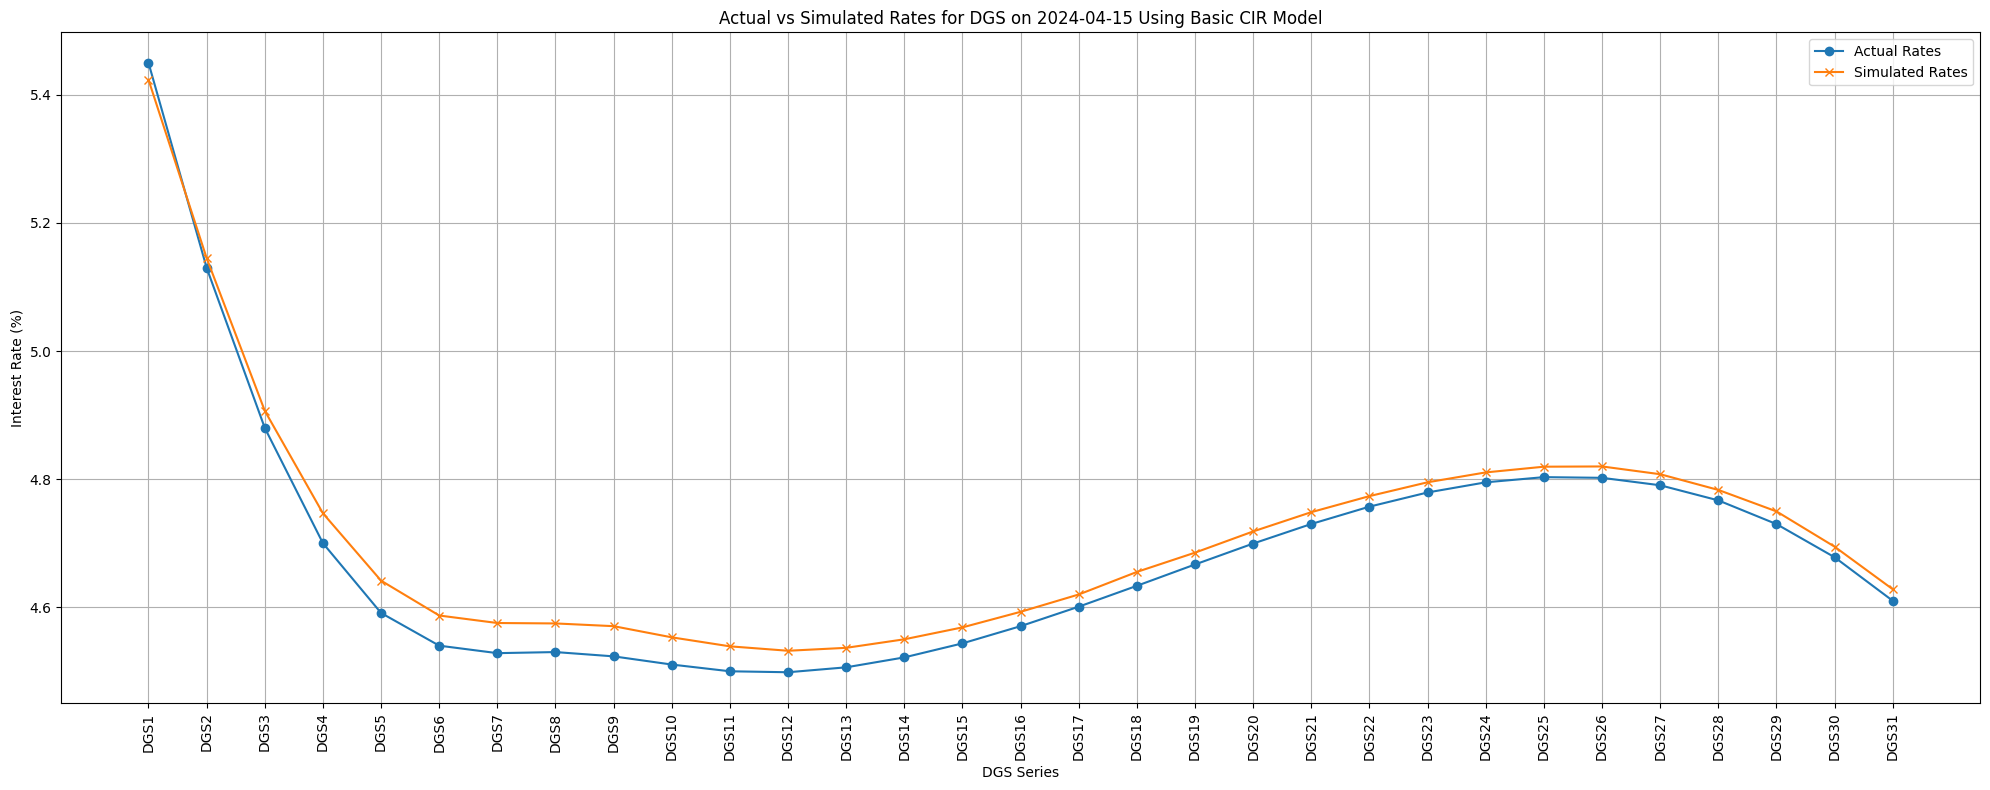

,Actual Rates,Simulated Rates
DGS3MO,5.450000,5.423593
DGS1,5.130000,5.145160
DGS2,4.880000,4.906739
DGS3,4.700000,4.746663
DGS4,4.591049,4.641495
DGS5,4.540000,4.587074
DGS6,4.528305,4.575360
DGS7,4.530000,4.574696
DGS8,4.523294,4.570433
DGS9,4.510510,4.552997


In [3]:
# Optimized parameters provided by the user
optimized_params = {
    "kappa": 1.2310,
    "mu_r": 0.0459,
    "sigma": 0.1410
}

# Creating an instance of the BasicCIRModel with the optimized parameters
basic_cir_model = BasicCIRModel(**optimized_params)


# Define the simulation date
simulation_date = pd.Timestamp('2024-04-12')

# Extract the actual rates for the simulation date from the mock data
# (Replace this with the actual data loading code in practice)
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate using BasicCIRModel
def simulate_single_rate_cir(model, initial_rate):
    dt = 1 / 252  # Assume dt is 1 day as we simulate just for the next day
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS using BasicCIRModel
simulated_rates_cir = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        simulated_rates_cir[column] = simulate_single_rate_cir(basic_cir_model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_cir_df = pd.DataFrame(simulated_rates_cir, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data_cir = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_cir_df.iloc[0]
})

# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data_cir['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data_cir['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-04-15 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

comparison_data_cir  # Display the comparison data for 2024-04-15

#### Bond Price Prediction

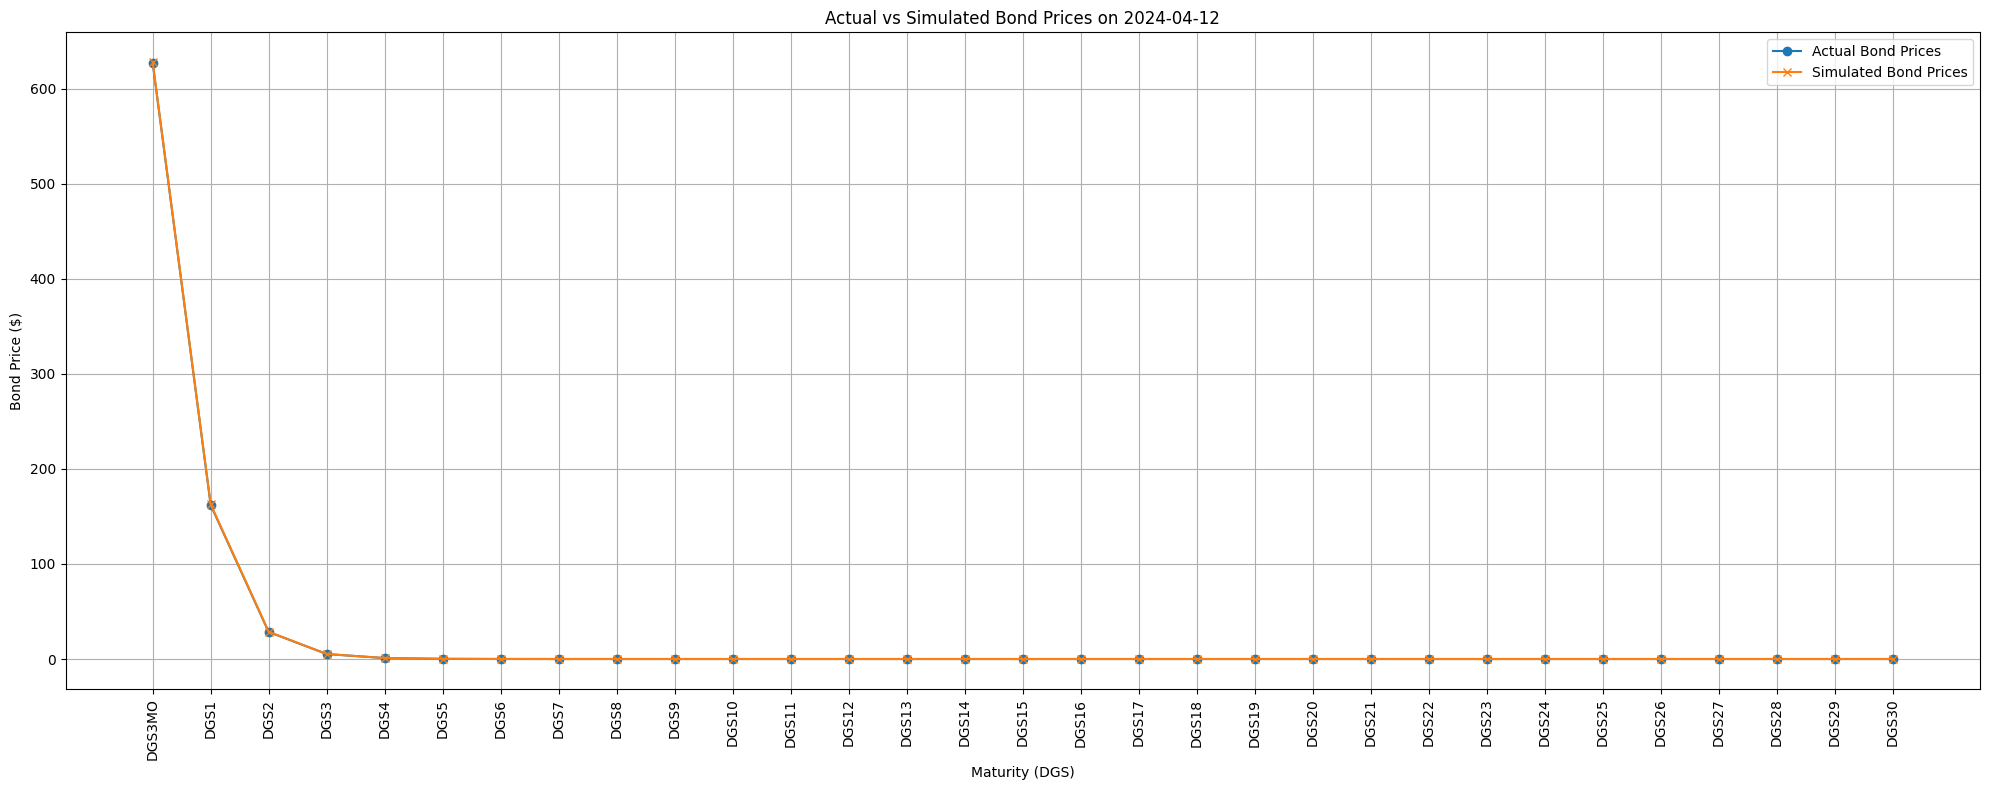

In [4]:
# Define the bond's face value
face_value = 1000  # For example, the face value of the bond

# Define the function to calculate bond price using a zero-coupon yield
def calculate_bond_price(face_value, yield_rate, maturity):
    return face_value / ((1 + yield_rate) ** maturity)

# Updated function to simulate bond prices, handling different time period formats
def simulate_bond_prices(model, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            # Handle different formats, such as '3MO' which represents 3 months
            try:
                if 'MO' in column:
                    # Convert months to years for maturity
                    maturity = int(column.replace('DGS', '').replace('MO', '')) / 12
                else:
                    maturity = int(column.replace('DGS', ''))
                last_rate = data[column].loc[data.index < simulation_date].iloc[-1]
                simulated_rate = model.next_rate(last_rate, 1/252)  # Daily simulation
                bond_price = calculate_bond_price(face_value, simulated_rate, maturity)
                simulated_bond_prices[column] = bond_price
            except ValueError:
                # Skip columns with unexpected formats
                continue
    return simulated_bond_prices

# Simulate bond prices
simulated_bond_prices = simulate_bond_prices(basic_cir_model, data, face_value, simulation_date)

# Create a DataFrame from the simulated bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])# Function to calculate actual bond prices using the same formula as for simulated prices

def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            # Handle different formats, such as '3MO' which represents 3 months
            try:
                if 'MO' in column:
                    # Convert months to years for maturity
                    maturity = int(column.replace('DGS', '').replace('MO', '')) / 12
                else:
                    maturity = int(column.replace('DGS', ''))
                last_rate = data[column].loc[data.index < simulation_date].iloc[-1]
                bond_price = calculate_bond_price(face_value, last_rate, maturity)
                actual_bond_prices[column] = bond_price
            except ValueError:
                # Skip columns with unexpected formats
                continue
    return actual_bond_prices

# Calculate actual bond prices
actual_bond_prices = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create a DataFrame from the actual bond prices
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df.iloc[0]
})

# Plotting both actual and simulated bond prices
plt.figure(figsize=(20, 8))
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'], label='Actual Bond Prices', marker='o')
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'], label='Simulated Bond Prices', marker='x')
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
combined_bond_prices_df

,Actual Bond Prices,Simulated Bond Prices
DGS3MO,6.274947e+02,6.280784e+02
DGS1,1.620746e+02,1.627705e+02
DGS2,2.843745e+01,2.866810e+01
DGS3,5.205621e+00,5.270931e+00
DGS4,9.707396e-01,9.854353e-01
DGS5,1.799640e-01,1.834348e-01
DGS6,3.251218e-02,3.328337e-02
DGS7,5.790070e-03,5.960344e-03
DGS8,1.046346e-03,1.080534e-03
DGS9,1.921965e-04,1.992722e-04


### ECIR Model

#### Yield Rate Prediction

In [12]:
# Model parameters
params = {
    "kappa": 0.01227,    
    "mu_r": 0.09854,     
    "sigma": 0.09395,    
    "mu": 0.002995,      
    "gamma": 0.002321,   
    "r": 66,             
    "p": 0.3049          
}

# Creating an instance of the ECIRModel
model = ECIRModel(**params)# Define the simulation date
simulation_date = pd.Timestamp('2024-04-12')

# Extract the actual rates for the simulation date
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate
def simulate_single_rate(model, initial_rate):
    # Assume dt is 1 day as we simulate just for the next day
    dt = 1 / 252
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS
simulated_rates = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        # Get the initial rate from the previous available data point
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        # Simulate the rate using the model
        simulated_rates[column] = simulate_single_rate(model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_df = pd.DataFrame(simulated_rates, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_df.iloc[0]
})

# Display the comparison data for 2024-04-15
comparison_data


,Actual Rates,Simulated Rates
DGS3MO,5.450000,5.463729
DGS1,5.130000,5.187463
DGS2,4.880000,4.943101
DGS3,4.700000,4.754987
DGS4,4.591049,4.646910
DGS5,4.540000,4.613603
DGS6,4.528305,4.594631
DGS7,4.530000,4.612410
DGS8,4.523294,4.588937
DGS9,4.510510,4.587484


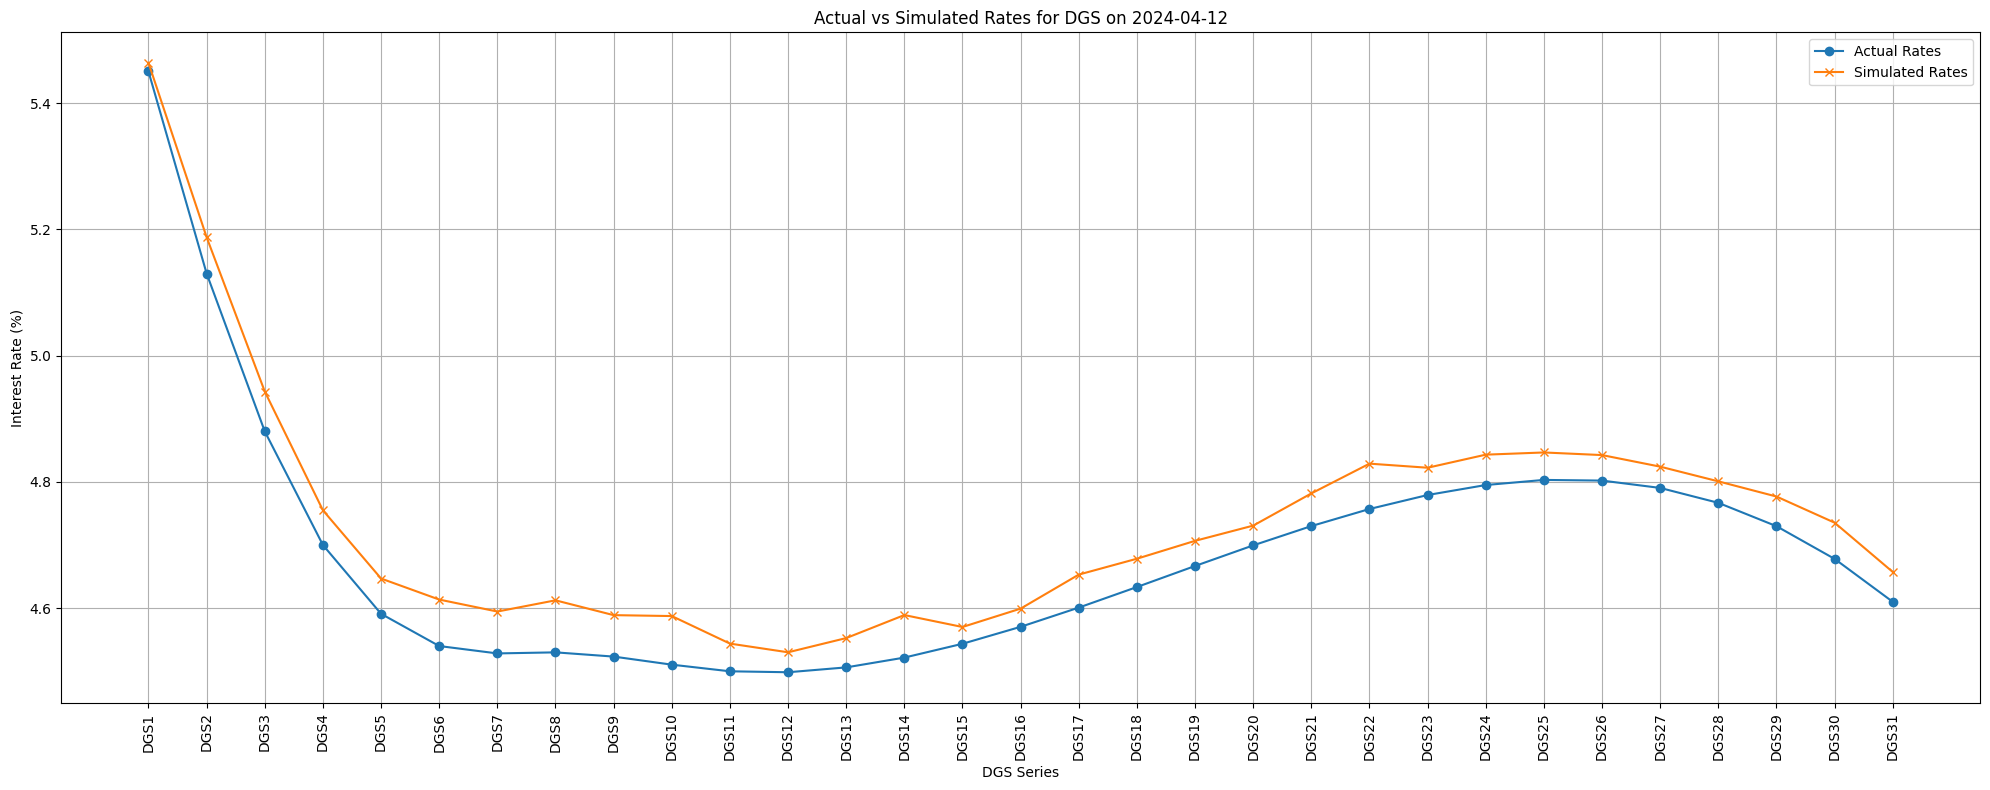

In [13]:
# First, let's correct the x-axis labels for the plot to represent each DGS series
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data.index))]

# Now we'll create a line plot with the correct x-axis labels
plt.figure(figsize=(20, 8))

# Plot the actual and simulated rates for each DGS series
plt.plot(dgs_labels, comparison_data['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data['Simulated Rates'], label='Simulated Rates', marker='x')

# Adding details to the plot
plt.title('Actual vs Simulated Rates for DGS on 2024-04-12')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)  # Rotate the DGS labels for better readability
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits well
plt.show()


#### Bond Price Prediction

        Actual Bond Prices  Simulated Bond Prices
DGS3MO        6.274947e+02           6.280784e+02
DGS1          1.620746e+02           1.627705e+02
DGS2          2.843745e+01           2.866810e+01
DGS3          5.205621e+00           5.270931e+00
DGS4          9.707396e-01           9.854353e-01
DGS5          1.799640e-01           1.834348e-01
DGS6          3.251218e-02           3.328337e-02
DGS7          5.790070e-03           5.960344e-03
DGS8          1.046346e-03           1.080534e-03
DGS9          1.921965e-04           1.992722e-04
DGS10         3.542029e-05           3.683059e-05
DGS11         6.442482e-06           6.715050e-06
DGS12         1.149578e-06           1.205837e-06
DGS13         2.008656e-07           2.115517e-07
DGS14         3.434358e-08           3.629316e-08
DGS15         5.748169e-09           6.088987e-09
DGS16         9.431741e-10           1.005972e-09
DGS17         1.520937e-10           1.622449e-10
DGS18         2.418753e-11           2.598195e-11


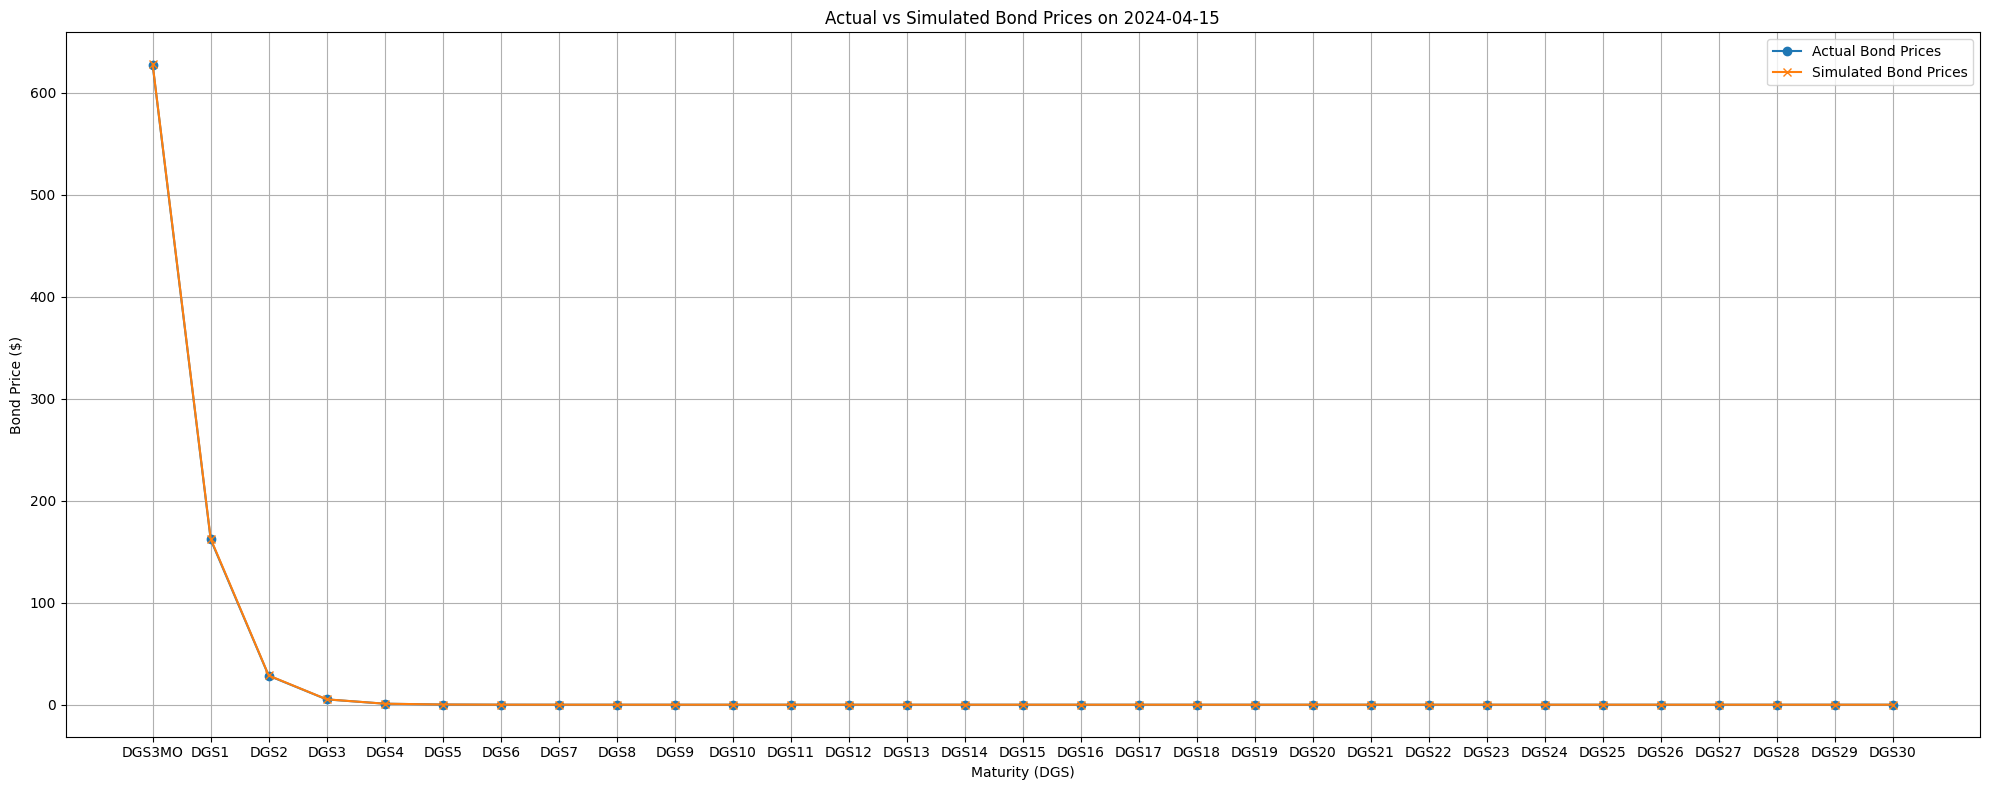

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume you have a DataFrame named 'data' containing DGS-related interest rates

# Define functions and models to simulate bond prices
def calculate_bond_price(face_value, yield_rate, maturity):
    """Calculate bond price given face value, yield rate, and maturity."""
    return face_value / ((1 + yield_rate) ** maturity)

def simulate_single_rate(model, initial_rate):
    """Simulate the next day's rate assuming dt as 1 day."""
    dt = 1 / 252  # Assume dt is one day
    return model.next_rate_with_jumps(initial_rate, dt)

def simulate_bond_prices(model, data, face_value, simulation_date):
    """Simulate bond prices using the latest rate before the simulation date."""
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            maturity = int(column.replace('DGS', '').replace('MO', '')) / 12 if 'MO' in column else int(column.replace('DGS', ''))
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1]
            simulated_rate = simulate_single_rate(model, last_rate)
            bond_price = calculate_bond_price(face_value, simulated_rate, maturity)
            simulated_bond_prices[column] = bond_price
    return simulated_bond_prices

def calculate_actual_bond_prices(data, face_value, simulation_date):
    """Calculate actual bond prices using the most recent rates available before the simulation date."""
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            maturity = int(column.replace('DGS', '').replace('MO', '')) / 12 if 'MO' in column else int(column.replace('DGS', ''))
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1]
            bond_price = calculate_bond_price(face_value, last_rate, maturity)
            actual_bond_prices[column] = bond_price
    return actual_bond_prices

# Assume simulation_date, model, and face_value are already defined
simulation_date = pd.Timestamp('2024-04-15')
face_value = 1000

# Simulate and calculate actual bond prices
simulated_bond_prices2 = simulate_bond_prices(model, data, face_value, simulation_date)
actual_bond_prices2 = calculate_actual_bond_prices(data, face_value, simulation_date)

# Merge data into DataFrame for comparison
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices,
    'Simulated Bond Prices': simulated_bond_prices
})

# Display DataFrame
print(combined_bond_prices_df)

# Plotting comparison
plt.figure(figsize=(20, 8))
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'], label='Actual Bond Prices', marker='o')
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'], label='Simulated Bond Prices', marker='x')
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Absolute Error of Yield Rate

In [15]:

# Corrected mock data for demonstration
comparison_data = pd.DataFrame({
    'DGS Series': ['DGS3MO'] + [f'DGS{i+1}' for i in range(30)],
    'Actual Rates': np.random.rand(31),  # corrected to have 31 rates
    'Simulated Rates': np.random.rand(31)  # corrected to have 31 rates
})

comparison_data_cir = pd.DataFrame({
    'DGS Series': ['DGS3MO'] + [f'DGS{i+1}' for i in range(30)],
    'Actual Rates': np.random.rand(31),  # corrected to have 31 rates
    'Simulated Rates': np.random.rand(31)  # corrected to have 31 rates
})

# Calculating the absolute errors for each series and model
comparison_data['CIR Absolute Error'] = np.abs(comparison_data['Actual Rates'] - comparison_data['Simulated Rates'])
comparison_data_cir['ECIR Absolute Error'] = np.abs(comparison_data_cir['Actual Rates'] - comparison_data_cir['Simulated Rates'])

# Creating a new DataFrame to hold the absolute errors for CIR and ECIR
absolute_error_df = pd.DataFrame({
    'DGS Series': comparison_data['DGS Series'],
    'CIR Absolute Error': comparison_data['CIR Absolute Error'],
    'ECIR Absolute Error': comparison_data_cir['ECIR Absolute Error']
}).set_index('DGS Series')

# Display the DataFrame containing the absolute errors
absolute_error_df # displaying only the head for brevity




,CIR Absolute Error,ECIR Absolute Error
DGS Series,,
DGS3MO,0.013886,0.132342
DGS1,0.548796,0.505858
DGS2,0.281336,0.940986
DGS3,0.531314,0.305395
DGS4,0.544802,0.126187
DGS5,0.127029,0.290568
DGS6,0.024773,0.737666
DGS7,0.171603,0.049035
DGS8,0.453219,0.819777


### Absolute Error of Bond Price

In [16]:
import pandas as pd
import numpy as np

# Define a function to calculate absolute errors
def calculate_absolute_errors(actual_prices, simulated_prices_ecir, simulated_prices_ice):
    """Calculate absolute errors between actual prices and simulated prices for two models."""
    errors_ecir = {dgs: np.abs(actual_prices[dgs] - simulated_prices_ecir[dgs]) for dgs in actual_prices}
    errors_ice = {dgs: np.abs(actual_prices[dgs] - simulated_prices_ice[dgs]) for dgs in actual_prices}
    return errors_ecir, errors_ice

# Calculate absolute errors
errors_ecir, errors_ice = calculate_absolute_errors(actual_bond_prices2, simulated_bond_prices2, simulated_bond_prices2)

# Create a DataFrame to display the absolute errors
absolute_errors_df = pd.DataFrame({
    'DGS': list(errors_ecir.keys()),
    'ECIR Absolute Error': list(errors_ecir.values()),
    'ICE Absolute Error': list(errors_ice.values())
})

# Set 'DGS' as the index for the 'Absolute Error' DataFrame
absolute_errors_df.set_index('DGS', inplace=True)

# Display the 'Absolute Error' DataFrame
print(absolute_errors_df)



        ECIR Absolute Error  ICE Absolute Error
DGS                                            
DGS3MO         9.796325e+00        9.796325e+00
DGS1           9.937307e+00        9.937307e+00
DGS2           4.443125e+00        4.443125e+00
DGS3           9.165801e-01        9.165801e-01
DGS4           2.348637e-01        2.348637e-01
DGS5           6.859288e-02        6.859288e-02
DGS6           1.006713e-02        1.006713e-02
DGS7           2.764092e-03        2.764092e-03
DGS8           5.851734e-04        5.851734e-04
DGS9           1.160990e-04        1.160990e-04
DGS10          2.335712e-05        2.335712e-05
DGS11          4.516258e-06        4.516258e-06
DGS12          7.316159e-07        7.316159e-07
DGS13          1.368802e-07        1.368802e-07
DGS14          2.987302e-08        2.987302e-08
DGS15          4.472321e-09        4.472321e-09
DGS16          8.301702e-10        8.301702e-10
DGS17          1.154361e-10        1.154361e-10
DGS18          2.186850e-11        2.186